AirBnB Data Analysis

Data Fetching & Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('AirBnB.csv')

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_9712\3083142198.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('AirBnB.csv')


In [4]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Check the column names in the Dataset

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Data Cleaning & Preprocessing
Check for Missing Values

In [7]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Handle the Missing Values

In [11]:
# To check any particular field top 10 values 
df['last review'].head(10)

0    10/19/2021
1     5/21/2022
2           NaN
3      7/5/2019
4    11/19/2018
5     6/22/2019
6     10/5/2017
7     10/5/2017
8     6/24/2019
9     7/21/2017
Name: last review, dtype: object

In [13]:
# Convert 'last review' to datetime and handle errors, errors='coerce' it means it will convert missing values to Nat format
df['last review']=pd.to_datetime(df['last review'],errors='coerce')

#Fill missing values
df.fillna({'reviews per month':0, 'last review':df['last review'].min()}, inplace=True)

# Drop records with missing 'name' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [15]:
df.head(20)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,2017-10-05,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,2017-07-21,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,$64,1.0,160.0,2019-06-09,1.33,3.0,4.0,1.0,NaN,NaN


In [16]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

To remove unnecessary columns like house rules and ignore which are not required for analysis

In [17]:
df = df.drop(columns=['house_rules','license'], errors='ignore')

In [18]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

# Here price and service fee are included with $ sign, so we remove that sign and change its dtype

Correct Data Types

In [19]:
df['price'] =df['price'].replace('[\$,]','',regex=True).astype(float)
df['service fee'] =df['service fee'].replace('[\$,]','',regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\SAGAR\AppData\Local\Temp\ipykernel_9712\836703720.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] =df['price'].replace('[\$,]','',regex=True).astype(float)
C:\Users\SAGAR\AppData\Local\Temp\ipykernel_9712\836703720.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] =df['service fee'].replace('[\$,]','',regex=True).astype(float)


In [20]:
df['price'].head(5)

0    966.0
1    142.0
2    620.0
4    204.0
5    577.0
Name: price, dtype: float64

In [21]:
df['service fee'].head(5)

0    193.0
1     28.0
2    124.0
4     41.0
5    115.0
Name: service fee, dtype: float64

Remove Duplicates

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

Descriptive Statistics

In [25]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


#Actual Problem statements

1. Distribution of Prices

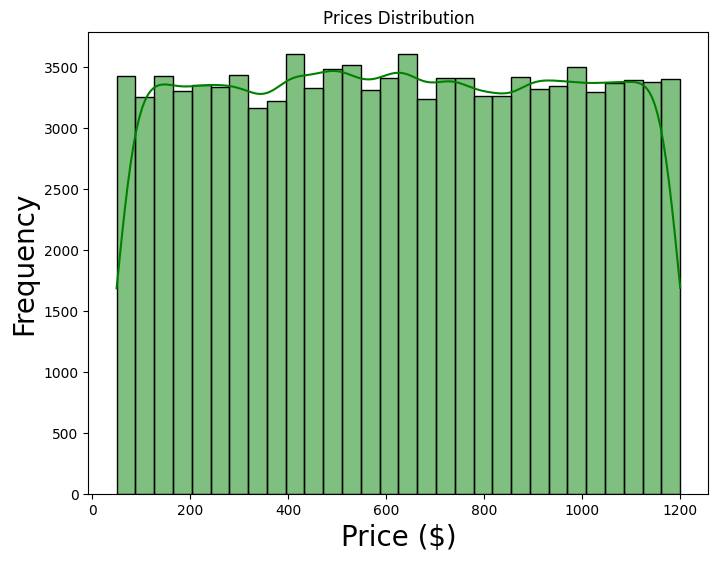

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title('Prices Distribution')
plt.xlabel('Price ($)',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

#kde is for curve variation

Insight Generation: Even distribution of price range, there is no particular spike observed for particular price 

2. How different room  types are distributed

In [32]:
df['room type'].head(10)

0        Private room
1     Entire home/apt
2        Private room
4     Entire home/apt
5     Entire home/apt
6        Private room
7        Private room
8        Private room
9        Private room
10    Entire home/apt
Name: room type, dtype: object

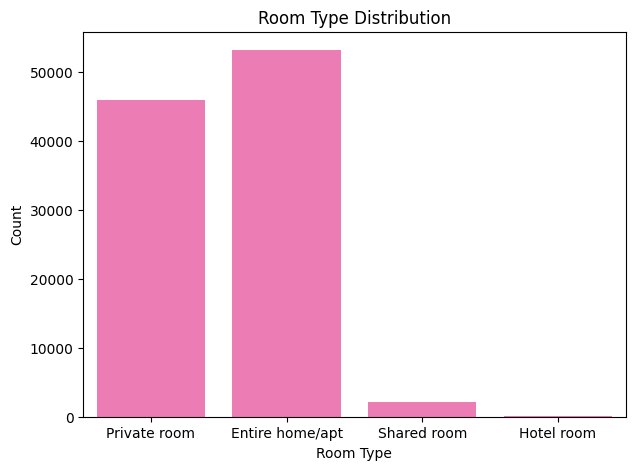

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(x='room type', data=df, color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type',size=10)
plt.ylabel('Count',size=10)
plt.show()

Insight Generation: Entire home/Apt shows the max count/most preferred booking type, second one is the private room.

3.Examine how listings are distributed across different neighborhoods.

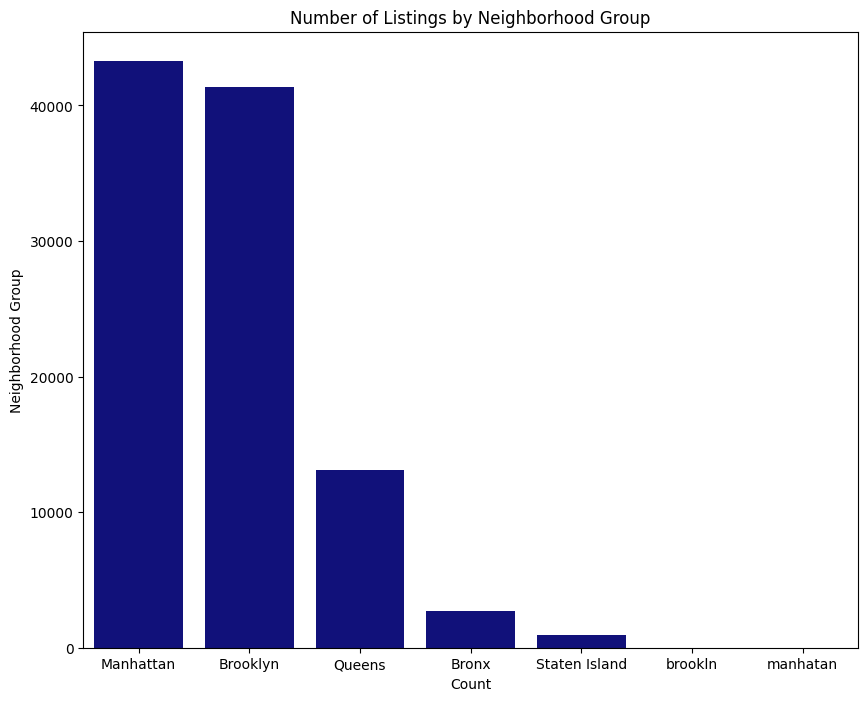

In [48]:
plt.figure(figsize=(10, 8))
sns.countplot(x='neighbourhood group', data=df,color="darkblue" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

Insight Generation: Most popular Neighbourhood groups are Manhattan, Brooklyn, Queens

4. Visualize the relationship between price and room type

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_9712\3748806386.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


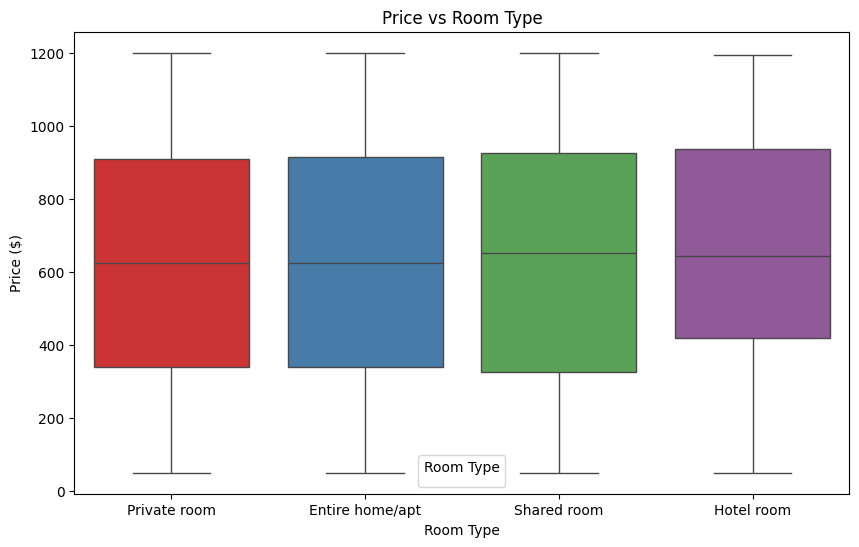

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type', y='price',data=df, hue='room type',palette='Set1')
plt.title('Price vs Room Type')
plt.xlabel('Room Type',size=10)
plt.ylabel('Price ($)',size=10)
plt.legend(title='Room Type')
plt.show()

Insight Generation: Price vs. Room Type
The box plot provides a detailed view
of how prices vary across different room types
in the Airbnb dataset. It shows that while
'Shared room' tends to have lower prices, 'Private room',
'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.
This visualization helps in understanding the pricing
dynamics for different types of accommodations on Airbnb.


5. Reviews over Time

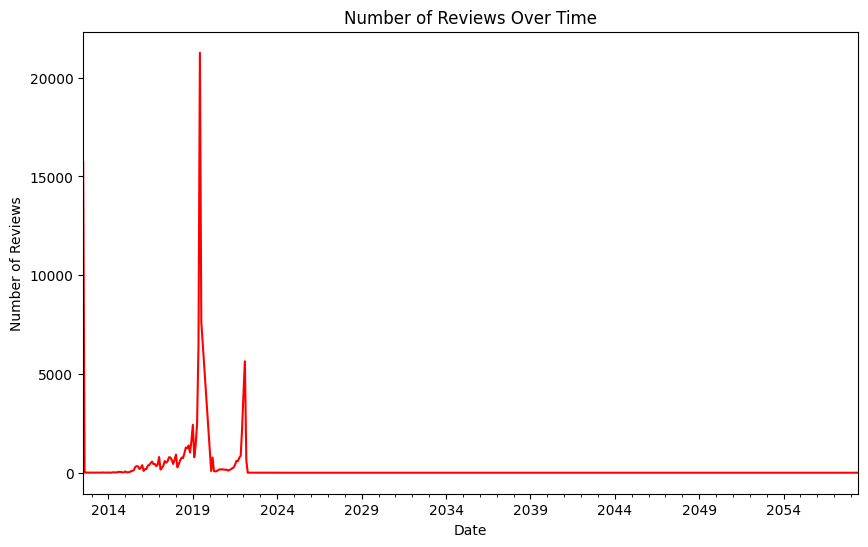

In [55]:
df['last review'] =pd.to_datetime(df['last review'])
reviews_over_time=df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(10,6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

Insight Generation: We can see the number of reviews during 2019 was tremendously high, and all time it was good between 2019 to near 2024.